In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving diabetes.csv to diabetes (2).csv


In [ ]:
import io

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       168
           1       0.63      0.63      0.63        86

    accuracy                           0.75       254
   macro avg       0.72      0.72      0.72       254
weighted avg       0.75      0.75      0.75       254

[[136  32]
 [ 32  54]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[127  41]
 [ 36  50]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       168
           1       0.55      0.58      0.56        86

    accuracy                           0.70       254
   macro avg       0.66      0.67      0.67       254
weighted avg       0.70      0.70      0.70       254



In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions2 = dtree.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions2))
print(confusion_matrix(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       168
           1       0.58      0.64      0.61        86

    accuracy                           0.72       254
   macro avg       0.69      0.70      0.70       254
weighted avg       0.73      0.72      0.72       254

[[128  40]
 [ 31  55]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[137  31]
 [ 31  55]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       168
           1       0.64      0.64      0.64        86

    accuracy                           0.76       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.76      0.76      0.76       254



In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

X.shape,y.shape

((768, 8), (768,))

In [ ]:
#balancing the data 
#Over sampling 
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os = RandomOverSampler()

In [ ]:
X_train_res,y_train_res = os.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train_res.shape,y_train_res.shape

((1000, 8), (1000,))

In [ ]:
from collections import Counter 
print('original dataset{}'.format(Counter(y)))
print('sample dataset shape{}'.format(Counter(y_train_res)))

original datasetCounter({0: 500, 1: 268})
sample dataset shapeCounter({1: 500, 0: 500})


In [ ]:
#ensemble techniques
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
#bagging classifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[332   0]
 [  0 182]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    332.0  182.0       1.0      514.0         514.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[133  35]
 [ 30  56]]
ACCURACY SCORE:
0.7441
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.815951   0.615385  0.744094    0.715668      0.748043
recall       0.791667   0.651163  0.744094    0.721415      0.744094
f1-score     0.803625   0.632768  0.744094    0.718197      0.745776
support    168.000000  86.000000  0.744094  254.000000    254.000000


In [ ]:
scores = { 'bagging classifier' : {
    'train': accuracy_score(y_train,bagging_clf.predict(X_train)),
    'test': accuracy_score(y_test,bagging_clf.predict(X_test))
}
          
        }

In [ ]:
#extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[332   0]
 [  0 182]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    332.0  182.0       1.0      514.0         514.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[136  32]
 [ 33  53]]
ACCURACY SCORE:
0.7441
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.804734   0.623529  0.744094    0.714132      0.743381
recall       0.809524   0.616279  0.744094    0.712901      0.744094
f1-score     0.807122   0.619883  0.744094    0.713502      0.743726
support    168.000000  86.000000  0.744094  254.000000    254.000000


In [ ]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

In [ ]:
#ada boost
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[295  37]
 [ 48 134]]
ACCURACY SCORE:
0.8346
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.860058    0.783626   0.83463    0.821842      0.832995
recall       0.888554    0.736264   0.83463    0.812409      0.834630
f1-score     0.874074    0.759207   0.83463    0.816640      0.833401
support    332.000000  182.000000   0.83463  514.000000    514.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[136  32]
 [ 32  54]]
ACCURACY SCORE:
0.7480
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.809524   0.627907  0.748031    0.718715      0.748031
recall       0.809524   0.627907  0.748031    0.718715      0.748031
f1-score     0.809524   0.627907  0.748031    0.718715      0.748031
support    168.000000  86.000000  0.748031  254.000000    254.000000


In [ ]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

In [ ]:
#gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[326   6]
 [ 21 161]]
ACCURACY SCORE:
0.9475
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.939481    0.964072  0.947471    0.951777      0.948188
recall       0.981928    0.884615  0.947471    0.933272      0.947471
f1-score     0.960236    0.922636  0.947471    0.941436      0.946922
support    332.000000  182.000000  0.947471  514.000000    514.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[132  36]
 [ 31  55]]
ACCURACY SCORE:
0.7362
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.809816   0.604396   0.73622    0.707106      0.740264
recall       0.785714   0.639535   0.73622    0.712625      0.736220
f1-score     0.797583   0.621469   0.73622    0.709526      0.737954
support    168.000000  86.000000   0.73622  254.000000    254.000000


In [ ]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[313  19]
 [ 76 106]]
ACCURACY SCORE:
0.8152
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.804627    0.848000  0.815175    0.826314      0.819985
recall       0.942771    0.582418  0.815175    0.762594      0.815175
f1-score     0.868239    0.690554  0.815175    0.779396      0.805323
support    332.000000  182.000000  0.815175  514.000000    514.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[142  26]
 [ 38  48]]
ACCURACY SCORE:
0.7480
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.788889   0.648649  0.748031    0.718769      0.741406
recall       0.845238   0.558140  0.748031    0.701689      0.748031
f1-score     0.816092   0.600000  0.748031    0.708046      0.742927
support    168.000000  86.000000  0.748031  254.000000    254.000000


In [ ]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }


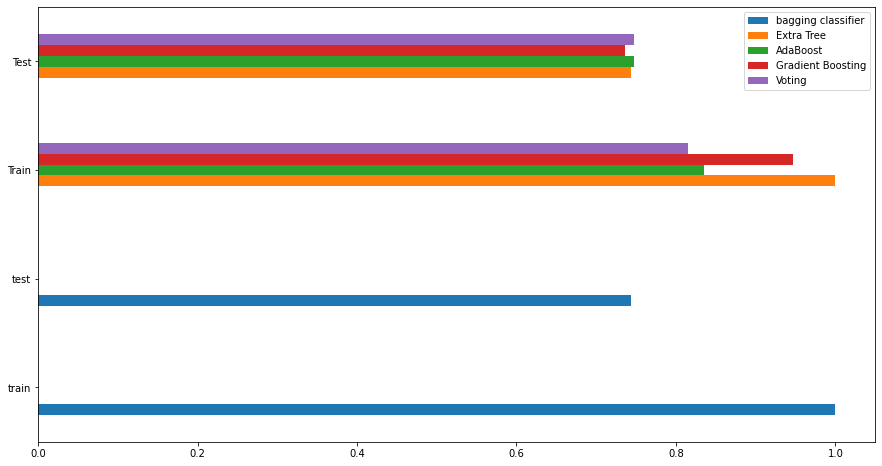

In [ ]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))
